In [ ]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def load_train_data():
  train_data = pd.read_csv('/content/linkedin_train.csv', header = 0)
  X_train = train_data.drop(columns='fake')
  y_train = train_data['fake']
  return X_train, y_train
from sklearn.datasets import load_files
def load_test_data():
  test_data = pd.read_csv('/content/linkedin_test.csv', header = 0)
  X_test = test_data.drop(columns='fake')
  y_test = test_data['fake']
  return X_test, y_test
from sklearn.model_selection import cross_validate
def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
  scores = cross_validate(model, X, y, cv=cv, scoring=scoring,
return_train_score=True)
  train_scores = scores['train_score']
  val_scores = scores['test_score']
  train_mean = np.mean(train_scores)
  val_mean = np.mean(val_scores)
  return train_mean, val_mean
def print_grid_search_result(grid_search):
  print(grid_search.best_params_)
  best_train =grid_search.cv_results_["mean_train_score"][grid_search.best_index_]
  print("best mean_train_score: {:.3f}".format(best_train))
  best_test =grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
  print("best mean_test_score: {:.3f}".format(best_test))
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_actual, y_pred, labels, title=''):
  data = confusion_matrix(y_actual, y_pred)
  ax = sns.heatmap(data,
          annot=True,
          cbar=False,
          fmt='d',
          xticklabels = labels,
          yticklabels = labels)
  ax.set_title(title)
  ax.set_xlabel("predicted values")
  ax.set_ylabel("actual values")


In [ ]:
#data loading
X_data, y_data = load_train_data()
X_data.info()
X_data.head()
X_data.tail()
X_data.shape
y_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6922 entries, 0 to 6921
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           6922 non-null   int64  
 1   nums/length username  6922 non-null   float64
 2   fullname words        6922 non-null   int64  
 3   nums/length fullname  6922 non-null   float64
 4   name==username        6922 non-null   int64  
 5   description length    6922 non-null   int64  
 6   external URL          6922 non-null   int64  
 7   private               6922 non-null   int64  
 8   #posts                6922 non-null   int64  
 9   #followers            6922 non-null   int64  
 10  #connections          6922 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 595.0 KB


(6922,)

In [ ]:
# Finding Missing Values
X_data.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


Label:  0 , Frequency:  3456
Label:  1 , Frequency:  3466


Text(0.5, 1.0, 'Correlation Heatmap Between Features')

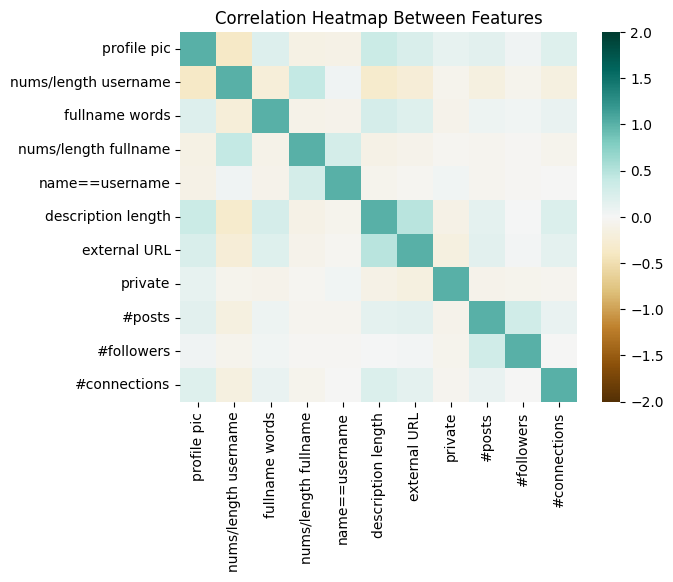

In [ ]:
# Check if Imbalance in Labels
#labels is about 1:1 which means there is no imbalance in the labels.
#but here the ratio would be more 2:1.
unique, freq = np.unique(y_data, return_counts = True)
for i, j in zip(unique, freq):
  print("Label: ", i, ", Frequency: ", j)
data_corr = X_data.corr(method='pearson')
ax = sns.heatmap(data_corr, vmin=-2, vmax=2, cmap='BrBG')
ax.set_title("Correlation Heatmap Between Features")

In [ ]:
#Create Training And Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,
random_state=50)
print(X_train.shape)
print(y_train.shape)

(5537, 11)
(5537,)


In [ ]:
#Models Comparision Using Cross-Validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
model_list = [LogisticRegression(max_iter=600),
        SVC(),
        GaussianNB(),
        RandomForestClassifier(random_state=55),
        GradientBoostingClassifier(random_state=56)]
train_scores = []
val_scores = []
for model in model_list:
  train, val = get_classifier_cv_score(model, X_train, y_train,'average_precision')
  train_scores.append(train)
  val_scores.append(val)
  models_score = sorted(list(zip(val_scores, train_scores, model_list)),
reverse=True)
print("-------------------------------------")
for val, train, model in models_score:
  print("\nModel: {} ".format(model.__class__.__name__))
  print("\ntrain_score: {:.3f}".format(train))
  print("\nvalidation_score: {:.3f}".format(val))
  print("-------------------------------------")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

-------------------------------------

Model: RandomForestClassifier 

train_score: 1.000

validation_score: 1.000
-------------------------------------

Model: GradientBoostingClassifier 

train_score: 1.000

validation_score: 1.000
-------------------------------------

Model: LogisticRegression 

train_score: 0.982

validation_score: 0.982
-------------------------------------

Model: SVC 

train_score: 0.926

validation_score: 0.926
-------------------------------------

Model: GaussianNB 

train_score: 0.800

validation_score: 0.802
-------------------------------------


In [ ]:
#Hyperparameter Tuning Using Grid Search
#Grid Search for RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os
model = RandomForestClassifier(random_state=55)
parameters = {'n_estimators': [300, 500, 700, 1000],
        'max_depth': [7, 9, 11, 13]}
grid1 = GridSearchCV(model, parameters, cv=7, scoring='average_precision',return_train_score=True)
grid1.fit(X_train, y_train)
print_grid_search_result(grid1)

{'max_depth': 9, 'n_estimators': 300}
best mean_train_score: 1.000
best mean_test_score: 1.000


In [ ]:
#Grid Search for Gradient Boosting Classifier
model = GradientBoostingClassifier(max_depth=5, random_state=56)
parameters = {'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}
grid2 = GridSearchCV(model, parameters, cv=7, scoring='average_precision', return_train_score=True)
grid2.fit(X_train, y_train)
print_grid_search_result(grid2)

{'learning_rate': 0.1, 'n_estimators': 100}
best mean_train_score: 1.000
best mean_test_score: 1.000


In [ ]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([('preprocessing', StandardScaler()), ('classifier', grid1.best_estimator_)])
pipeline.fit(X_train, y_train)
print("Test score: {:.3f}".format(pipeline.score(X_test, y_test)))

Test score: 0.998


Test score: 0.917
              precision    recall  f1-score   support

     genuine       0.92      0.92      0.92       720
        fake       0.92      0.92      0.92       719

    accuracy                           0.92      1439
   macro avg       0.92      0.92      0.92      1439
weighted avg       0.92      0.92      0.92      1439



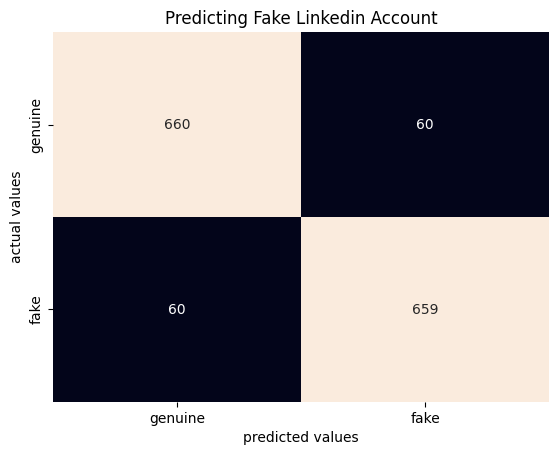

In [ ]:
#Final Evaluation
X_final, y_final = load_test_data()
print("Test score: {:.3f}".format(pipeline.score(X_final, y_final)))
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_final)
print(classification_report(y_final, y_pred, target_names=["genuine", "fake"]))
labels = ["genuine", "fake"]
title = "Predicting Fake Linkedin Account"
plot_confusion_matrix(y_final, y_pred, labels, title)